In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D  # Para crear los objetos de la leyenda

# Función para leer el archivo de datos
def leer_datos(filename):
    data = np.loadtxt(filename)
    T, rm, rm2, error, mc_tau, c = data.T  # Transponer para asignar correctamente
    return T, rm, rm2, error, mc_tau, c

In [78]:
Tc = 2.269  # Temperatura crítica del modelo de Ising 2D
J_k = 1.0  # Factor J/k para la ecuación de Onsager

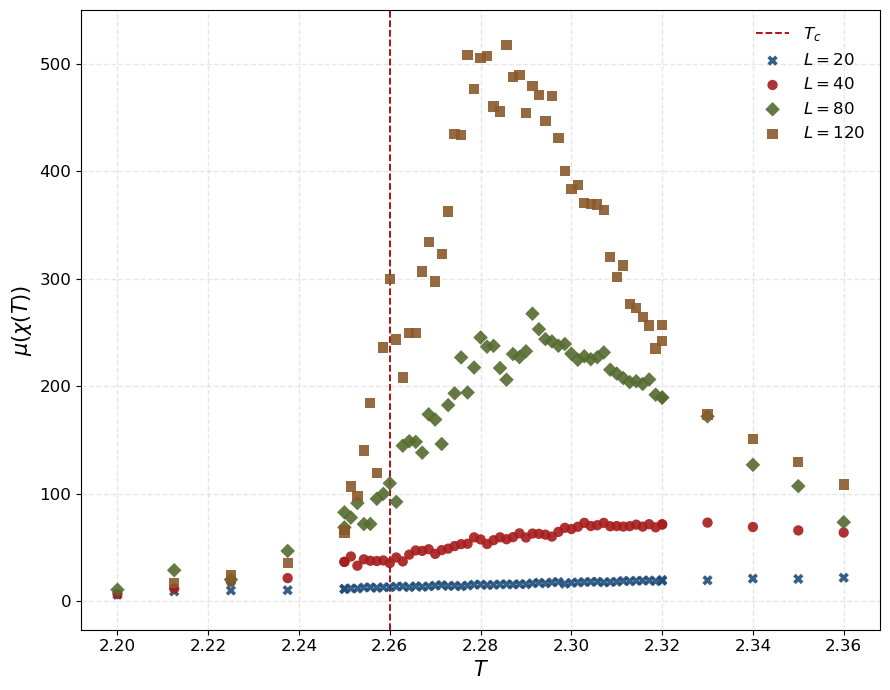

In [82]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 7))

# Paleta de colores sobrios y diferenciables
colors = ['#1f4e79', '#a61c1c', '#556b2f', '#8b5a2b', '#4b4b4b']
markers = ['X', 'o', 'D', 's']

# Línea vertical para Tc
ax.axvline(Tc, linestyle='--', color='#aa0000', linewidth=1.3, label=r"$T_c$", zorder=2)

# Bucle sobre L
for i, L in enumerate([20, 40, 80, 120]):
    temperatura, magnetizacion, magnetizacion2, error, mc_tau, correlacion = leer_datos(f"Datos/L{L}/fort.77")

    # Cálculo de la susceptibilidad
    susceptibility = (L**2) * magnetizacion2    

    # Puntos
    ax.scatter(temperatura, susceptibility,
               color=colors[i], edgecolors='none', s=55, alpha=0.9,
               marker=markers[i], label=fr"$L = {L}$", zorder=4)

# Estética general
ax.set_xlabel(r"$T$", fontsize=15)
ax.set_ylabel(r"$\mu(\chi(T))$", fontsize=15)
ax.tick_params(labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.3)

# Leyenda sobria
ax.legend(fontsize=12, frameon=False)

# Ajustes finales
plt.tight_layout()
plt.ylim(top=550)
plt.savefig('susceptibilidad.png', dpi=300)
plt.show()


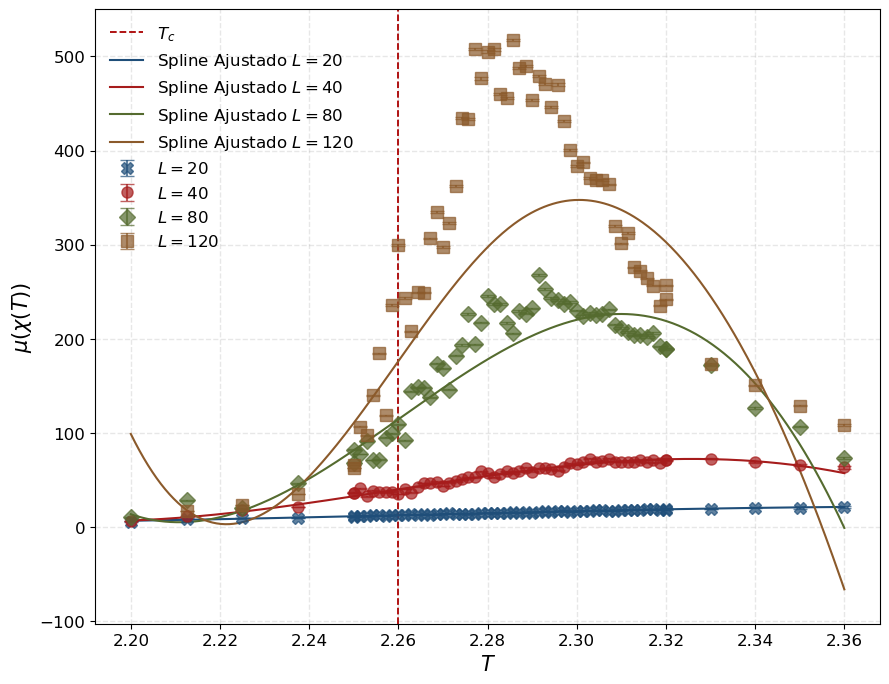

In [83]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

def leer_datos(filename):
    data = np.loadtxt(filename)
    T, rm, rm2, error, mc_tau, c = data.T
    return T, rm, rm2, error, mc_tau, c

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 7))

# Paleta de colores sobrios y diferenciables
colors = ['#1f4e79', '#a61c1c', '#556b2f', '#8b5a2b', '#4b4b4b']
markers = ['X', 'o', 'D', 's']

# Línea vertical para Tc
Tc = 2.26
ax.axvline(Tc, linestyle='--', color='#aa0000', linewidth=1.3, label=r"$T_c$", zorder=2)

# Bucle sobre L
for i, L in enumerate([20, 40, 80, 120]):
    temperatura, magnetizacion, magnetizacion2, error, mc_tau, correlacion = leer_datos(f"Datos/L{L}/fort.77")

    # Cálculo de la susceptibilidad
    susceptibility = (L**2) * magnetizacion2

    # Ordenar los datos por temperatura
    sorted_indices = np.argsort(temperatura)
    temp_sorted = temperatura[sorted_indices]
    susc_sorted = susceptibility[sorted_indices]
    error_sorted = error[sorted_indices]

    # Ajuste con UnivariateSpline
    # AJUSTA EL VALOR DE 's' PARA CONTROLAR LA SUAVIZACIÓN
    s_factor = len(temperatura)  # Empezar con el número de puntos
    s = s_factor * 100000000 # Prueba aumentando 's' para mayor suavidad

    spl = UnivariateSpline(temp_sorted, susc_sorted, w=1/error_sorted, s=s) # Ponderado por el error

    # Generar puntos más finos para la curva ajustada
    temp_fit = np.linspace(temp_sorted.min(), temp_sorted.max(), 500)
    susc_fit = spl(temp_fit)

    # Graficar la curva ajustada
    ax.plot(temp_fit, susc_fit, color=colors[i], linestyle='-', linewidth=1.5, label=fr"Spline Ajustado $L={L}$", zorder=3)

    # Puntos con barras de error (opcional)
    ax.errorbar(temperatura, susceptibility, yerr=100* error, fmt=markers[i], color=colors[i],
                markersize=8, alpha=0.7, label=fr"$L = {L}$", capsize=5, zorder=4)

# Estética general
ax.set_xlabel(r"$T$", fontsize=15)
ax.set_ylabel(r"$\mu(\chi(T))$", fontsize=15)
ax.tick_params(labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.3)

# Leyenda sobria
ax.legend(fontsize=12, frameon=False)

# Ajustes finales
plt.tight_layout()
plt.ylim(top=550)
plt.savefig('susceptibilidad_con_spline_ajustado.png', dpi=300)
plt.show()

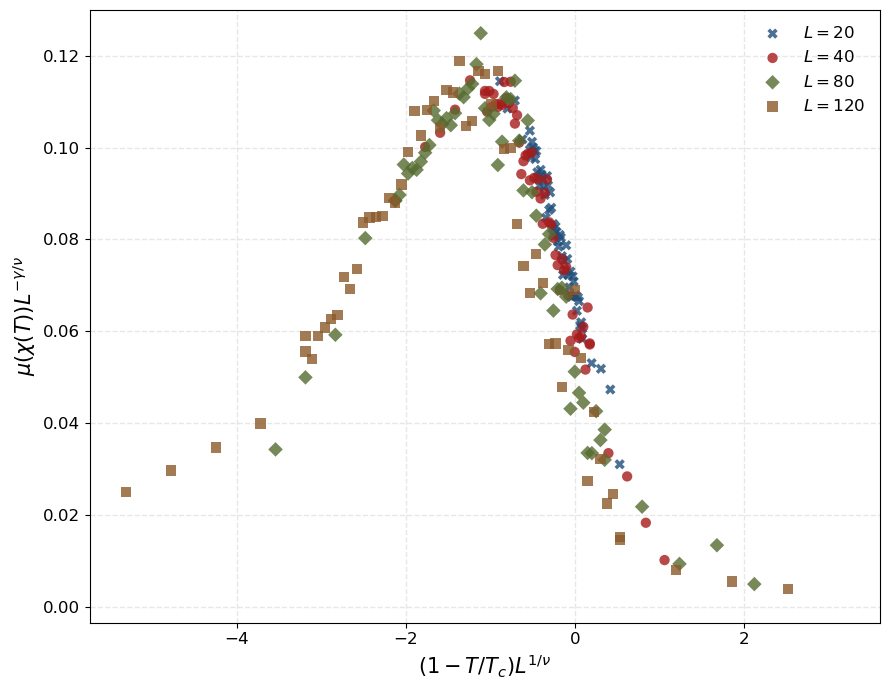

In [84]:
gamma_nu = -7/4
nu = 1.0

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 7))

# Paleta de colores sobrios y diferenciables
colors = ['#1f4e79', '#a61c1c', '#556b2f', '#8b5a2b', '#4b4b4b']
markers = ['X', 'o', 'D', 's']

# Bucle sobre L
for i, L in enumerate([20, 40, 80, 120]):
    temperatura, magnetizacion, magnetizacion2, error, mc_tau, correlacion = leer_datos(f"Datos/L{L}/fort.77")

    # Cálculo de la susceptibilidad
    susceptibility = (L**2) * magnetizacion2

    # Variable de escalado de temperatura corregida
    t_rescalado = (1 - temperatura / Tc) * (L**(1/nu))

    # Rescalar la susceptibilidad
    susceptibility_rescalada = susceptibility * (L**gamma_nu)

    # Plot de la susceptibilidad
    ax.scatter(t_rescalado, susceptibility_rescalada,
                color=colors[i], edgecolors='none', s=55, alpha=0.8,
                marker=markers[i], label=fr"$L = {L}$", zorder=4)

# Estética general
ax.set_xlabel(r"$(1-T/T_c)L^{1/\nu}$", fontsize=15)
ax.set_ylabel(r"$\mu(\chi(T))L^{-\gamma/\nu}$", fontsize=15)
ax.tick_params(labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.3)

# Leyenda sobria
ax.legend(fontsize=12, frameon=False)

# Ajustes finales
plt.tight_layout()
plt.ylim(top=0.13)
plt.savefig('susceptibilidad_colapsada.png', dpi=300)
plt.show()